# Reading and Desplaying Video

In [1]:
from scipy.misc import imread
from matplotlib import pyplot as plt
import numpy as np
import cv2

# create a VideoCapture object
cap = cv2.VideoCapture('kntu-computer.avi')
# sometimes this is needed:
#if not cap.isOpened():
# cap.open();
while True:
 # Capture frame-by-frame
 ret, I = cap.read()
 if ret == False: # end of video (perhaps)
    break
 cv2.imshow('Video Capture',I) # Display I
 key = cv2.waitKey(0) # ~ 30 frames per second
 #decrease waitKey -> speed up, increase waitKey -> slow down
 #cv2.waitKey(0) is identical to cv2.waitKey()
 if key == ord('q'): # exit when “q” is pressed
    break
 # replace the above with "if key 0xFF == ord('q')"
 # if it fails
cap.release()
cv2.destroyAllWindows()
print 'Finished'

Finished


# Write a Video on the disk

In [2]:
import numpy as np
import cv2
# create a VideoCapture object
cap = cv2.VideoCapture('eggs.avi')
# get the dimensions of the frame
# you can also read the first frame to get these
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width of the frame
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # height of the frame
fourcc = cv2.VideoWriter_fourcc(*'XVID') # choose codec
# opencv 2.x:
#w = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
#h = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
#fourcc = cv2.cv.CV_FOURCC(*'XVID')
# create VideoWriter object w by h, 30 frames per second
out = cv2.VideoWriter('eggs-reverse.avi',fourcc, 30.0, (w,h))
buff = []
while True:
    ret, I = cap.read()
    if ret == False: # end of video (or error)
        break
# write the current frame I
    buff.append(I)

for image in buff[::-1]:
    out.write(image)
    
cap.release()
out.release()
print 'Finished'

Finished


# Histogram

I.shape:  (379, 400)
I.revel.shape:  (151600,)


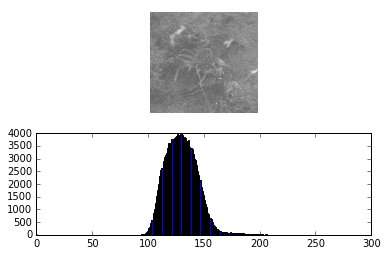

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fname = 'crayfish.jpg'
#fname = 'office.jpg'

I = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

f, axes = plt.subplots(2)

axes[0].imshow(I, 'gray', vmin=0, vmax=255)
axes[0].axis('off')
print 'I.shape: ',I.shape
print 'I.revel.shape: ',I.ravel().shape
axes[1].hist(I.ravel(),256,[0,256]);

plt.show()

I.shape:  (533, 533)
I.revel.shape:  (284089,)


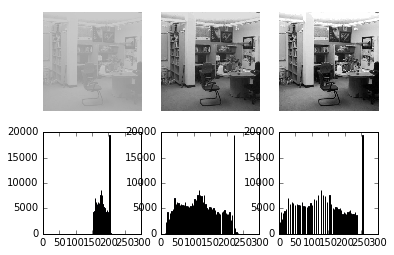

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#fname = 'crayfish.jpg'
fname = 'office.jpg'

I = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

min = 149
max = 211
J = (I-min) * 255.0 / (max-min)
J[J < 0] = 0
J[J > 255] = 255
J = J.astype(np.uint8)

K = cv2.equalizeHist(I)

f, axes = plt.subplots(2, 3)

axes[0,0].imshow(I, 'gray', vmin=0, vmax=255)
axes[0,0].axis('off')

axes[0,1].imshow(J, 'gray', vmin=0, vmax=255)
axes[0,1].axis('off')

axes[0,2].imshow(K, 'gray', vmin=0, vmax=255)
axes[0,2].axis('off')

print 'I.shape: ',I.shape
print 'I.revel.shape: ',I.ravel().shape
axes[1,0].hist(I.ravel(),256,[0,256]);
axes[1,1].hist(J.ravel(),256,[0,256]);
axes[1,2].hist(K.ravel(),256,[0,256]);

plt.show()

max:  211  ::: min:  149


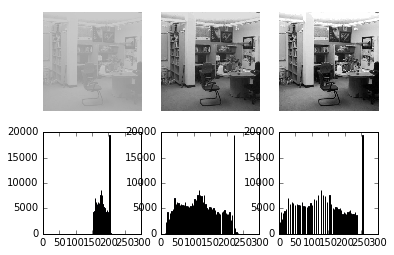

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("office.jpg",cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image],[0],None,[256],[0,256])
for i in range(len(hist)):
    if hist[i]!=0:
        min = i
        break
for i in range(len(hist)):
    if hist[i]!=0:
        max = i
print 'max: ',max,' ::: min: ',min
J = (image-min) *255.0/ (max-min)
J[J < 0] = 0
J[J > 255] = 255
J = J.astype(np.uint8)


f, axes = plt.subplots(2,3)
axes[0,0].imshow(image, 'gray', vmin=0,vmax=255)
axes[0,0].axis('off')
axes[1,0].hist(image.ravel(),256,[0,256])

axes[0,1].imshow(J, 'gray', vmin = 0, vmax = 255)
axes[0,1].axis('off')
axes[1,1].hist(J.ravel(),256,[0,256])

k = cv2.equalizeHist(image)
axes[0,2].imshow(k, 'gray', vmin=0, vmax=255)
axes[0,2].axis('off')
axes[1,2].hist(k.ravel(),256,[0,256])


plt.show()  